<a href="https://colab.research.google.com/github/BIRAN/python_related/blob/master/Call_R_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rpy2 Tutorial: Code Example
This code example is about how to call R packages and create R plots in Python, using rpy2. 

In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

packageNames = ('afex', 'emmeans')   # Analysis of Factorial Experiments(afex)
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]
packnames_to_install


if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘pbkrtest’, ‘lmerTest’, ‘car’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cloud.r-project.org/src/contrib/zip_2.0.3.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/r

In [2]:
data = robjects.r('read.table(file =' \
       '"http://personality-project.org/r/datasets/R.appendix3.data", header = T)')


# aov_ez: Allows definition of ANOVA-model using character strings
afex = rpackages.importr('afex') 
model = afex.aov_ez('Subject', 'Recall', data, within='Valence')
print(model)

Anova Table (Type 3 tests)

Response: Recall
   Effect         df  MSE          F ges p.value
1 Valence 1.15, 4.60 9.34 189.11 *** .93  <.0001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 



In [3]:
emmeans = rpackages.importr('emmeans', 
               robject_translations = {"recover.data.call": "recover_data_call1"})
pairwise = emmeans.emmeans(model, "Valence", contr="pairwise", adjust="holm")

print(pairwise)

$emmeans
 Valence emmean   SE   df lower.CL upper.CL
 Neg       27.8 1.57 7.33    24.12     31.5
 Neu       11.6 1.57 7.33     7.92     15.3
 Pos       40.0 1.57 7.33    36.32     43.7

Confidence level used: 0.95 

$contrasts
 contrast  estimate   SE df t.ratio p.value
 Neg - Neu     16.2 1.47  8  11.057 <.0001 
 Neg - Pos    -12.2 1.47  8  -8.327 <.0001 
 Neu - Pos    -28.4 1.47  8 -19.384 <.0001 

P value adjustment: holm method for 3 tests 




The following part is about R plots. We use 'graphics' and 'ggplot2' in R to display them in this Jupyter Notebook.

In [0]:
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image, display

graphics = robjects.packages.importr('graphics')

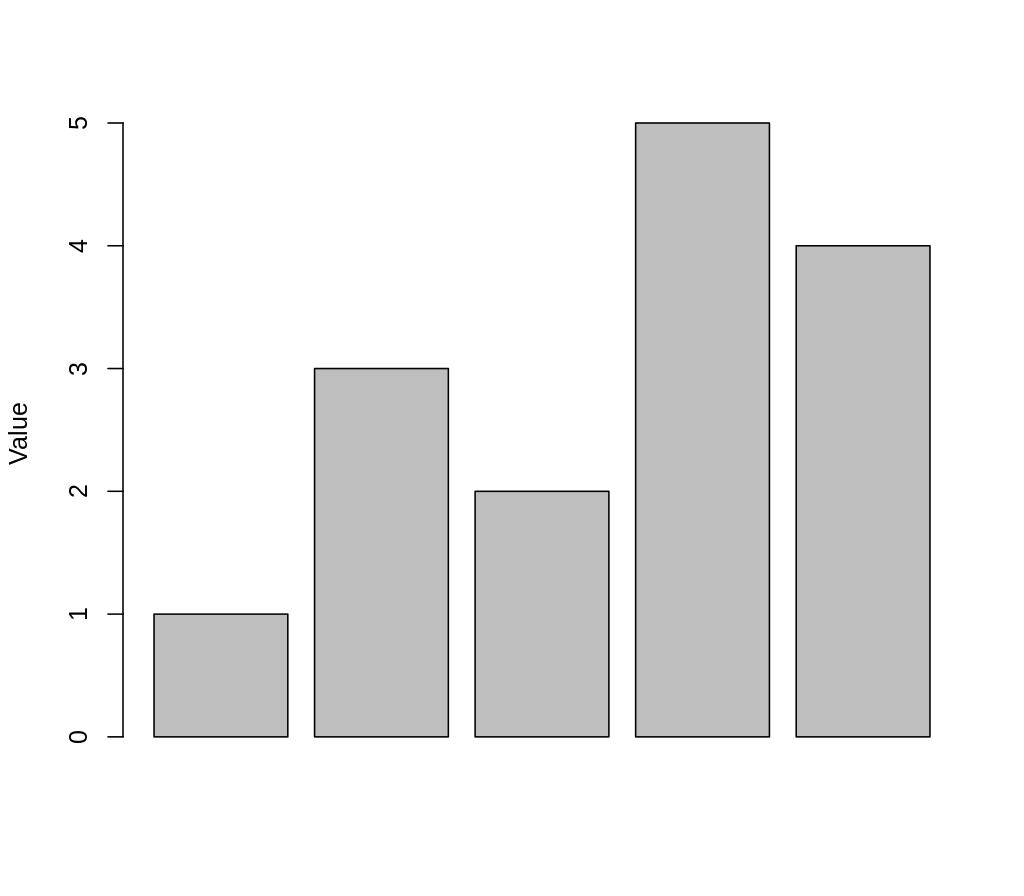

In [5]:
with grdevices.render_to_bytesio(grdevices.jpeg, width=1024, height=896, res=150) as img:
    graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")
    
display(Image(data=img.getvalue(), format='jpeg', embed=True))

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.2.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


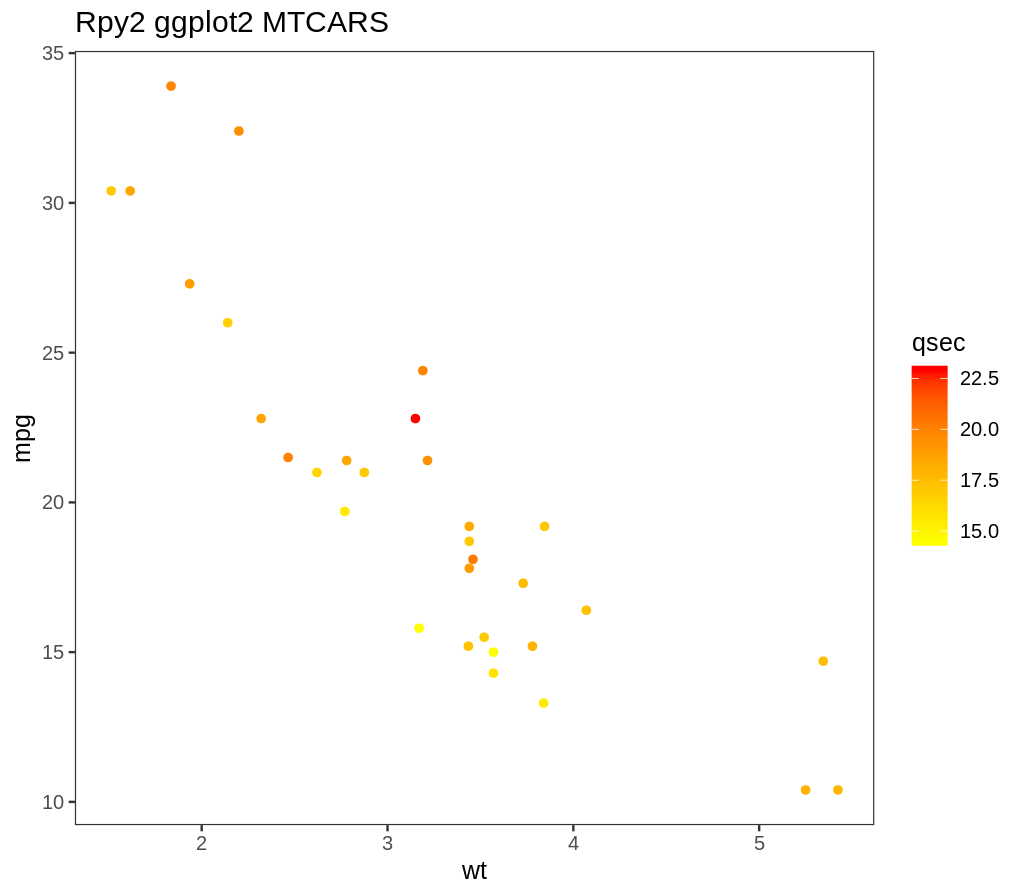

In [6]:
import rpy2.robjects.lib.ggplot2 as ggplot2

datasets = robjects.packages.importr('datasets')
mtcars = robjects.packages.data(datasets).fetch('mtcars')['mtcars']

with grdevices.render_to_bytesio(grdevices.png, width=1024, height=896, res=150) as img:
    gp = ggplot2.ggplot(mtcars)
    pp = (
        gp
        + ggplot2.aes_string(x='wt', y='mpg')
        + ggplot2.geom_point(ggplot2.aes_string(colour='qsec'))
        + ggplot2.scale_colour_gradient(low='yellow', high='red')
        + ggplot2.labs(title='Rpy2 ggplot2 MTCARS')
        + ggplot2.theme_bw()
        + ggplot2.theme(**{'panel.grid.major': ggplot2.element_blank(),
                           'panel.grid.minor': ggplot2.element_blank()
            
        })
        
    )
    
    pp.plot()
    
display(Image(data=img.getvalue(), format='png', embed=True))